In [1]:
import numpy as np  
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score

In [3]:
# import pandas as pd
# from faker import Faker
# import random

# fake = Faker()

# def generate_fake_data(num_rows):
#     data = []
#     for _ in range(num_rows):
#         pregnancies = random.randint(0, 17)
#         glucose = random.randint(0, 200)
#         blood_pressure = random.randint(0, 150)
#         skin_thickness = random.randint(0, 100)
#         insulin = random.randint(0, 300)
#         bmi = random.uniform(0, 50)
#         diabetes_pedigree_function = random.uniform(0, 2)
#         age=random.randint(0,90)
#         outcome = random.choice([0, 1])
        
#         data.append({
#             'Pregnancies': pregnancies,
#             'Glucose': glucose,
#             'BloodPressure': blood_pressure,
#             'SkinThickness': skin_thickness,
#             'Insulin': insulin,
#             'BMI': bmi,
#             'DiabetesPedigreeFunction': diabetes_pedigree_function,
#             'Age': age,
#             'Outcome': outcome
#         })
#     return data

# # Generate fake data
# fake_data = generate_fake_data(10000)

# # Create a DataFrame from the existing data
# existing_data = pd.read_csv('diabetes.csv')

# # Concatenate existing data with fake data
# combined_data = pd.concat([existing_data, pd.DataFrame(fake_data)], ignore_index=True)

# # Save to Excel
# combined_data.to_csv('data.csv', index=False)


In [2]:
# Read the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:

# X = diabetes_dataset.drop(columns=['Outcome'])  
# y = diabetes_dataset['Outcome']   
# smote = SMOTE(sampling_strategy='auto', random_state=42)  
# X_resampled, y_resampled = smote.fit_resample(X, y)
# df = pd.concat([X_resampled, y_resampled], axis=1)
# df

In [5]:
df=df.sample(frac=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
402,5,136,84,41,88,35.0,0.286,35,1
26,7,147,76,0,0,39.4,0.257,43,1
261,3,141,0,0,0,30.0,0.761,27,1
77,5,95,72,33,0,37.7,0.370,27,0
92,7,81,78,40,48,46.7,0.261,42,0
...,...,...,...,...,...,...,...,...,...
74,1,79,75,30,0,32.0,0.396,22,0
317,3,182,74,0,0,30.5,0.345,29,1
745,12,100,84,33,105,30.0,0.488,46,0
140,3,128,78,0,0,21.1,0.268,55,0


In [9]:
# X = df.drop(columns=['Outcome'])  
# y = df['Outcome']  
# smote = SMOTE(sampling_strategy='auto', random_state=42)  
# X_resampled, y_resampled = smote.fit_resample(X, y)
# df = pd.concat([X_resampled, y_resampled], axis=1)
# df

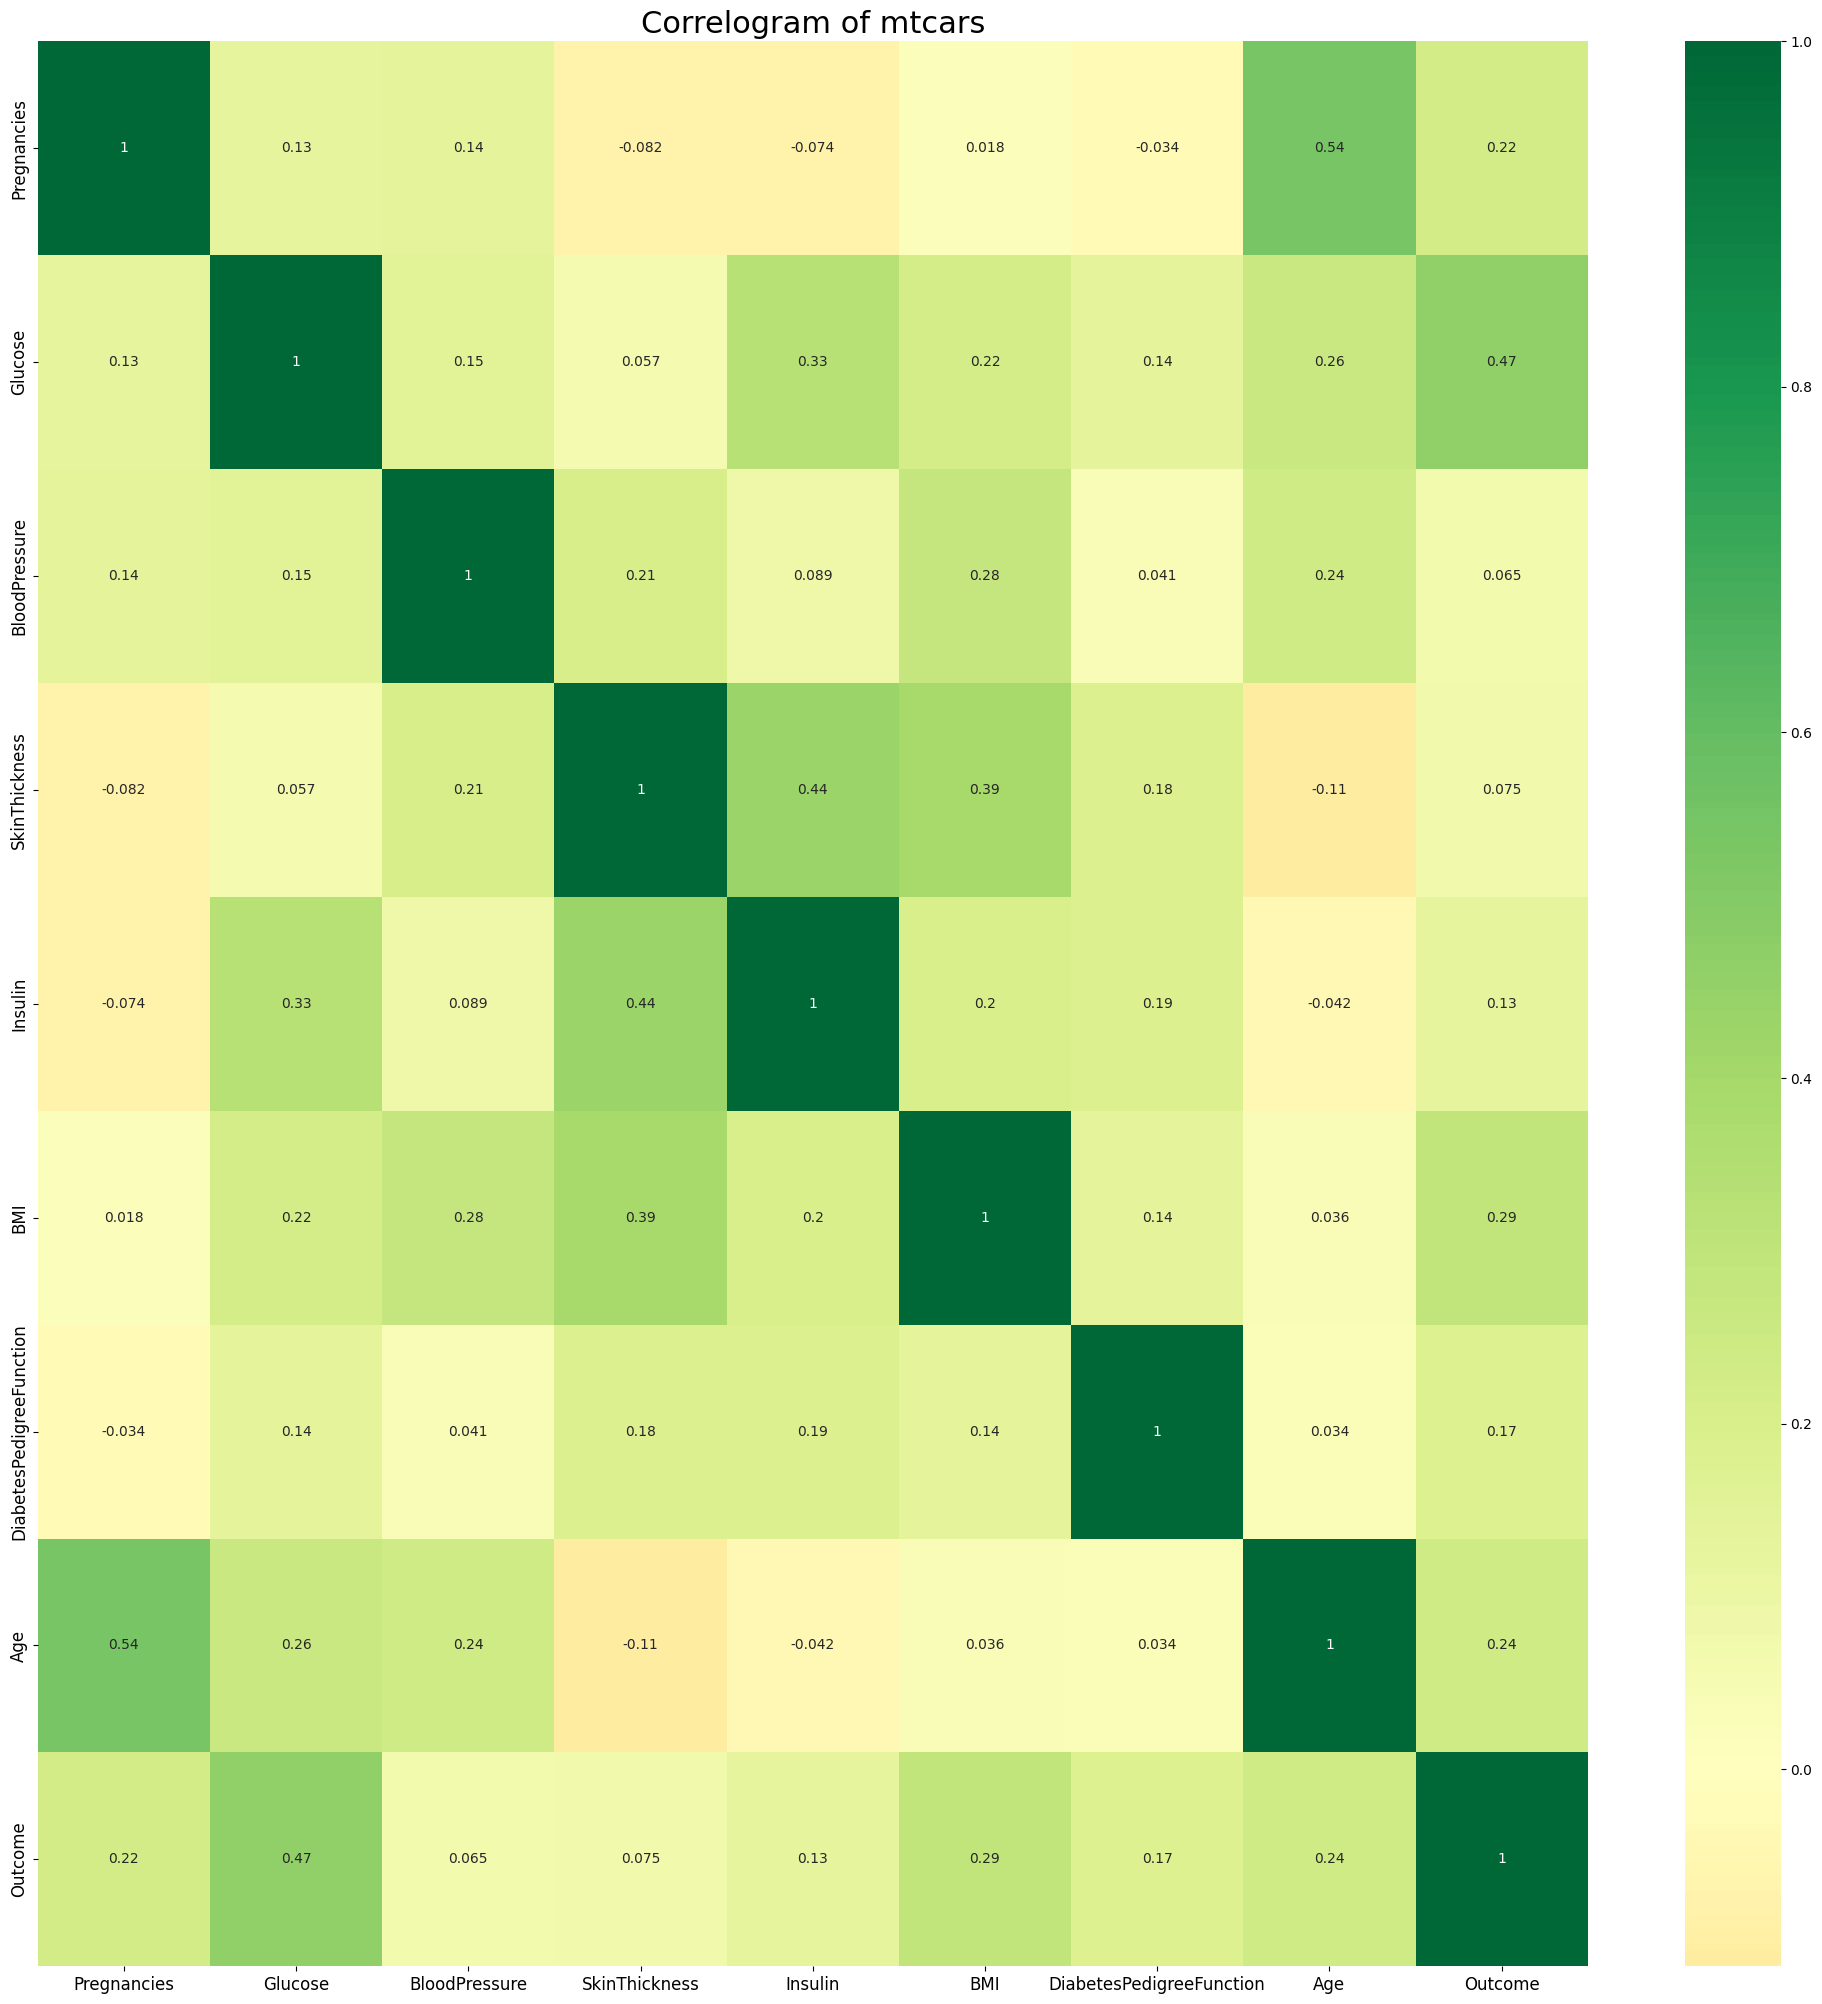

In [6]:
plt.figure(figsize=(25,25), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

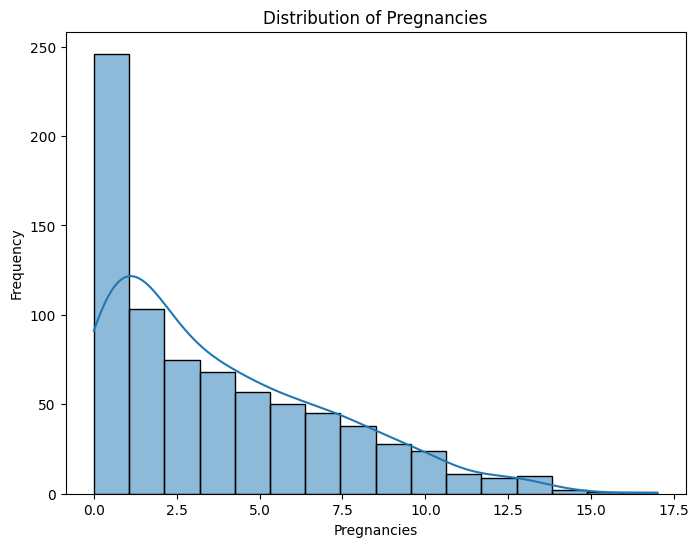

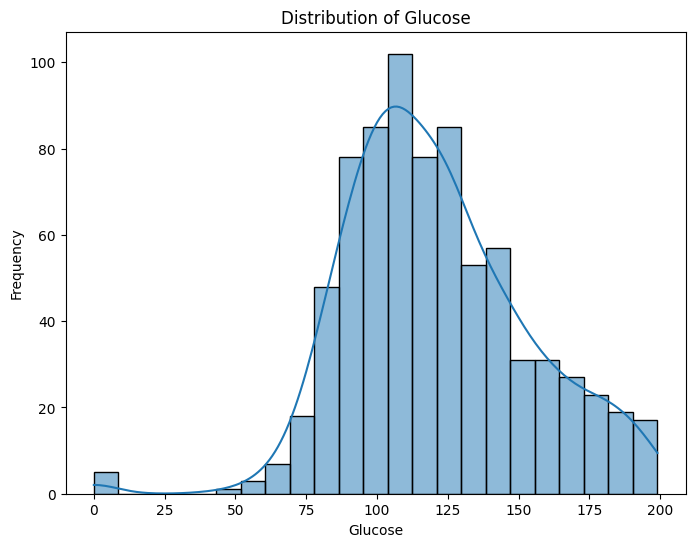

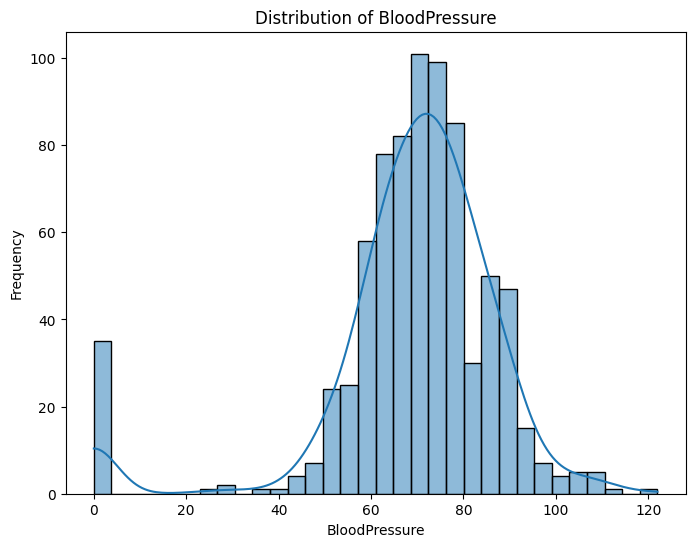

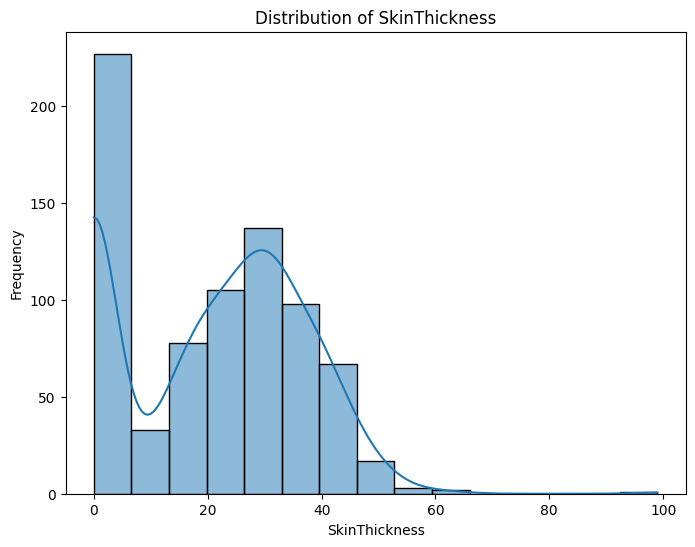

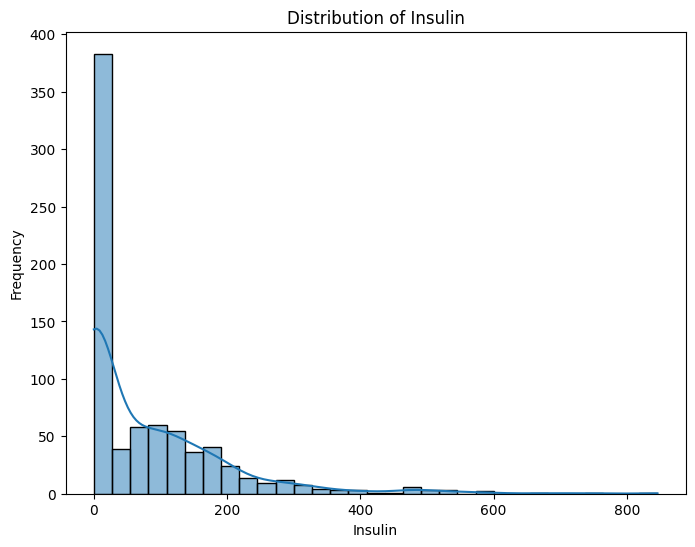

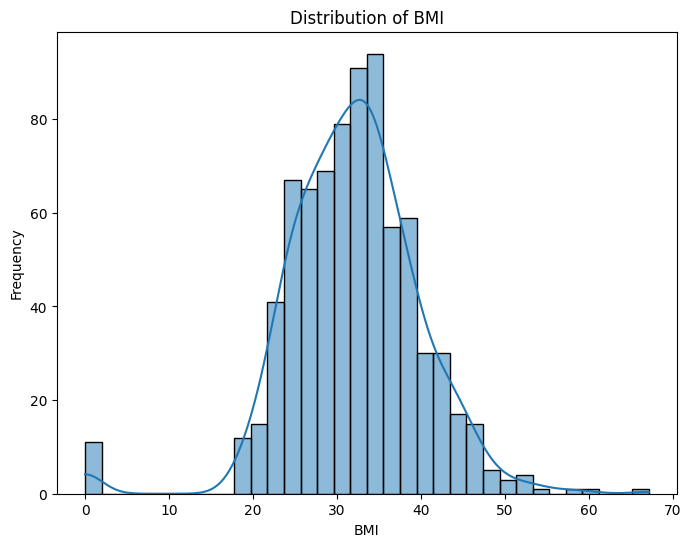

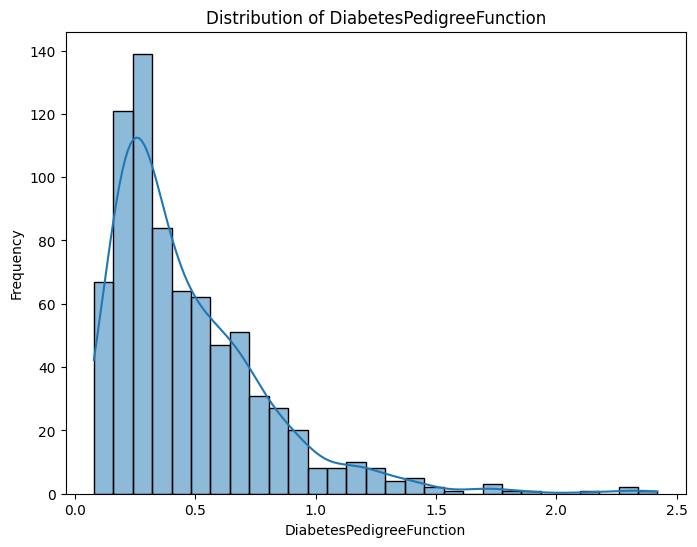

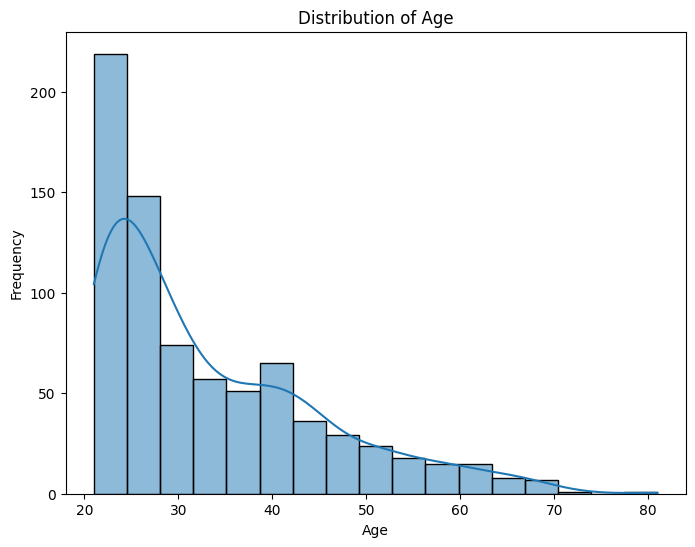

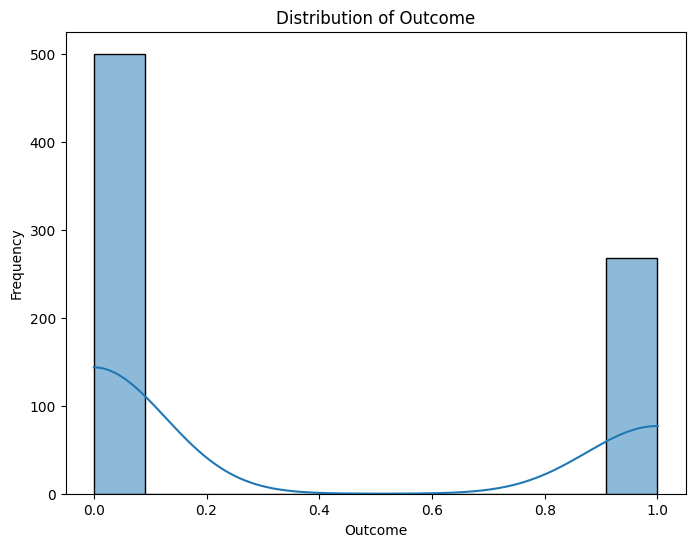

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the distribution of the column using a histogram
    sns.histplot(df[column], kde=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()


In [8]:
df=df.sample(frac=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
21,8,99,84,0,0,35.4,0.388,50,0
423,2,115,64,22,0,30.8,0.421,21,0
482,4,85,58,22,49,27.8,0.306,28,0
610,3,106,54,21,158,30.9,0.292,24,0
525,3,87,60,18,0,21.8,0.444,21,0
...,...,...,...,...,...,...,...,...,...
116,5,124,74,0,0,34.0,0.220,38,1
392,1,131,64,14,415,23.7,0.389,21,0
690,8,107,80,0,0,24.6,0.856,34,0
575,1,119,44,47,63,35.5,0.280,25,0


In [9]:
X=df.iloc[:,0:8]
X = np.log1p(X)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
21,2.197225,4.605170,4.442651,0.000000,0.000000,3.594569,0.327864,3.931826
423,1.098612,4.753590,4.174387,3.135494,0.000000,3.459466,0.351361,3.091042
482,1.609438,4.454347,4.077537,3.135494,3.912023,3.360375,0.266969,3.367296
610,1.386294,4.672829,4.007333,3.091042,5.068904,3.462606,0.256191,3.218876
525,1.386294,4.477337,4.110874,2.944439,0.000000,3.126761,0.367417,3.091042
...,...,...,...,...,...,...,...,...
116,1.791759,4.828314,4.317488,0.000000,0.000000,3.555348,0.198851,3.663562
392,0.693147,4.882802,4.174387,2.708050,6.030685,3.206803,0.328584,3.091042
690,2.197225,4.682131,4.394449,0.000000,0.000000,3.242592,0.618424,3.555348
575,0.693147,4.787492,3.806662,3.871201,4.158883,3.597312,0.246860,3.258097


In [10]:
y=df.iloc[:, 8]

In [11]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=128)
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.3
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print(f"F1 Score: {grid_search.best_score_:.4f}")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
F1 Score: 0.7639
Accuracy: 75.97%


In [14]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Confusion Matrix 
 [[67 31]
 [ 6 50]]


In [15]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78        98
           1       0.62      0.89      0.73        56

    accuracy                           0.76       154
   macro avg       0.77      0.79      0.76       154
weighted avg       0.81      0.76      0.76       154



In [17]:
from sklearn.metrics import accuracy_score

# Define a range of thresholds to try
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize variables to keep track of the best threshold and its corresponding accuracy
best_threshold = None
best_accuracy = 0

# Loop through each threshold
for threshold in thresholds:
    # Make predictions using the current threshold
    rf_predictions = (rf_probabilities > threshold).astype(int)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, rf_predictions)
    # Update best threshold and accuracy if the current threshold performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.4
Best Accuracy: 0.8181818181818182


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=128)

# Define the scorer
scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.5

# Get probabilities and make predictions based on the new threshold
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 81.82%


In [19]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        98
           1       0.79      0.68      0.73        56

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.81       154



In [20]:
from joblib import load

# Load the saved RandomForestClassifier model
loaded_rf_model = load('best_rf_model.pkl')


In [21]:
def predict_diabetes(model):
    # Gather user input for features
    preg = int(input("Enter number of pregnancies: "))
    glucose = float(input("Enter glucose level: "))
    bp = float(input("Enter blood pressure: "))
    skin = float(input("Enter skin thickness: "))
    insulin = float(input("Enter insulin level: "))
    bmi = float(input("Enter BMI: "))
    dpf = float(input("Enter Diabetes Pedigree Function: "))
    age = int(input("Enter age: "))
    
    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'Pregnancies': [preg],
        'Glucose': [glucose],
        'BloodPressure': [bp],
        'SkinThickness': [skin],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [dpf],
        'Age': [age]
    })
    
    # Make prediction
    prediction = model.predict(user_data)[0]
    
    # Display result
    if prediction == 1:
        print("The person is predicted to be diabetic.")
    else:
        print("The person is predicted not to be diabetic.")

# Assuming 'best_rf_model' is already trained
predict_diabetes(loaded_rf_model)


The person is predicted to be diabetic.


c:\Users\KARTAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

